Add you import statements and the database connection statements in the below code block

Database file path: /course/data/CSE-578/dinofunworld.db

In [8]:
# import statements here
import sqlite3
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform



db_filename = '/course/data/CSE-578/dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

**Question 1:**

Create and display a dendrogram of the trajectories of the 5 visitors specified above. The clustering algorithm used to create the dendrogram should use the average distance between points in a cluster.

**NOTE:**

* You can reuse the distance matrix from Assignment 3.
* Make sure to use the correct clustering algorithm.
* The dendrogram  should have the following parameters:
    * Title should be '**Dendrogram of Trajectories of 5 Visitors to the Park**'
    * xlabel should be '**Visitor ID**' and ylabel should be '**Distance**'.
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels




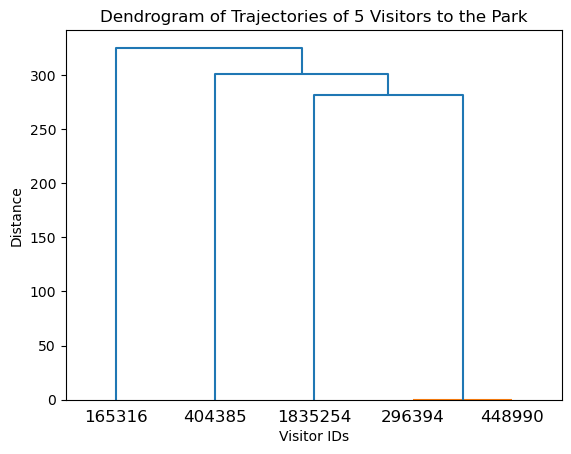

In [30]:
### TEST FUNCTION: test_question1
# DO NOT MODIFY OR REMOVE THE ABOVE LINE
# your code here
fiveVisitorsID = ['165316', '1835254', '296394', '404385', '448990']
sequences = {}
for visitorID in fiveVisitorsID:
    query = "SELECT sequence FROM sequences  WHERE visitorID=" + visitorID
    #print(query)
    c.execute(query)
    result = c.fetchone()
    #print(result)
    if result:
        tmpresult = result[0].split('-')
        sequences[visitorID] = tmpresult

#calculate dissimilarity/distance FUNCTION (1 dissimilar = distance + 1)
def cal_dist(seqX, seqY):
    lenX = len(seqX) #X lenth will equal Y length from discription
    dissimilar_count = 0
    for i in range(lenX):
        if seqX[i] != seqY[i]:
            dissimilar_count += 1
    return dissimilar_count

#distance matrix init
distance_matrix = {int(visitorID): {} for visitorID in fiveVisitorsID}
#print(distance_matrix)
for i, visitorX in enumerate(fiveVisitorsID):
    for j, visitorY in enumerate(fiveVisitorsID):
        if visitorX != visitorY:
            dist = cal_dist(sequences[visitorX], sequences[visitorY])
            tmpvisitorX = int(visitorX)
            tmpvisitorY = int(visitorY)
            distance_matrix[tmpvisitorX][tmpvisitorY] = dist

# print(distance_matrix)
# ===== above from assignment 3 =====


fiveVisitorsID = [int(s) for s in fiveVisitorsID]

dist_matrix = np.zeros((5, 5))

#make the symmetric matrix
for i in range(5):
    for j in range(5):
        if i != j:
            visitorX = fiveVisitorsID[i]
            visitorY = fiveVisitorsID[j]
            dist_matrix[i, j] = distance_matrix.get(visitorX, {}).get(visitorY, 0)

#to avoid printing out linkage error (change 2-d array to 1-d)
condensed_dist_matrix = squareform(dist_matrix) 

links = linkage(condensed_dist_matrix, 'average')
dendrogram(links, labels=fiveVisitorsID)
plt.xlabel('Visitor IDs')
plt.ylabel('Distance')
plt.title('Dendrogram of Trajectories of 5 Visitors to the Park')
plt.show()
